In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import *

### 단변량 분석

In [ ]:
PATH = 'MY_PATH'
playlist = pd.read_csv(PATH + '/playlist/playlist_processing.csv', index_col=0)
playlist

,artist_name,track_name,liked,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,lyrics,token
0,호미들,사이렌,0,44,0.770,0.536,4,-8.052,1,0.0804,0.8650,0.000000,0.1030,0.642,140.015,200143,4,울려댔어 사이렌\n텅 빈 길거리엔\n도망치다 흘린 칼자루와 피가 흥건해\n우리 그때...,"['man', 'way', 'bro', 'payback', 'make', 'know..."
1,호미들,넌 내게 안될거란 말을 했지만(prod. Kidstone),0,33,0.681,0.585,8,-7.966,1,0.3210,0.6250,0.000001,0.1800,0.559,77.494,175102,4,넌 내게 안될꺼란 말을 했지만\n이제 나를 봐 이건 명품이야\n쌈박질만 했지만\n난...,"['oh', 'came', 'nothing', 'retire', '21', 'lik..."
2,호미들,무덤 위에 소주를 부어줘,0,39,0.667,0.850,0,-2.648,0,0.0313,0.0951,0.000000,0.1570,0.290,145.040,191413,4,"난 맨몸으로 시작되어\n천 번은 슬프게 울음\n난 이제 새 신, 새 옷\n백 번은 ...","['tell', 'illusion', 'dont', 'like', 'bad', 'b..."
3,창모,METEOR,0,50,0.728,0.642,8,-4.989,1,0.0727,0.3160,0.000000,0.0834,0.755,185.795,197097,4,"Yeah, ha\nYeah, ha\nYeah, ha\nYeah, ha\nYeah, ...","['Yeah', 'ha', 'Yeah', 'ha', 'Yeah', 'ha', 'Ye..."
4,창모,아름다워,0,47,0.737,0.668,9,-5.675,1,0.0423,0.0390,0.000000,0.0800,0.344,87.933,220291,4,널 이제 놓아줘야 될것같애 의미없는 날짜를 셀것같애 내 손이 아닌 꽃이 무대인 나비...,"['bye', 'bay', 'diamond', 'luxury', 'thing', '..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,STAYC,YOUNG LUV,1,60,0.695,0.749,7,-4.187,0,0.0277,0.3920,0.000052,0.1040,0.458,129.905,206080,4,My love's so young\nI'm young 달콤한 나이\n너만 바라볼 순...,"['love', 'young', 'young', 'na', 'na', 'na', '..."
146,STAYC,SO BAD,1,63,0.557,0.906,7,-3.109,0,0.1030,0.1900,0.000000,0.0616,0.616,168.978,212265,4,"(STAYC)\nSTAYC girls, it's going down\n\nYou s...","['STAYC', 'STAYC', 'girls', 'going', 'stole', ..."
147,The Volunteers,Summer,1,45,0.424,0.633,6,-9.235,1,0.0283,0.0807,0.004850,0.2010,0.177,96.887,251033,4,Our eyes are closed\nBut we know when the sun ...,"['eyes', 'closed', 'know', 'sun', 'near', 'us'..."
148,5 Seconds of Summer,Youngblood,1,84,0.596,0.854,7,-5.114,0,0.4630,0.0169,0.000000,0.1240,0.152,120.274,203418,4,"Remember the words you told me, love me 'til t...","['Remember', 'words', 'told', 'love', 'til', '..."


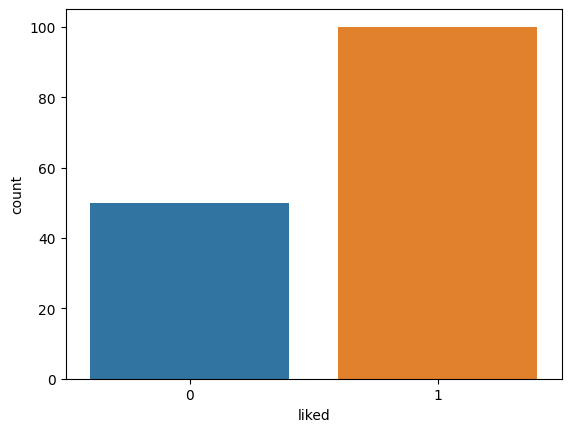

In [ ]:
sns.countplot(data = playlist, x = 'liked')
plt.show()

### preprocessing

In [ ]:
playlist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_name       150 non-null    object 
 1   track_name        150 non-null    object 
 2   liked             150 non-null    int64  
 3   popularity        150 non-null    int64  
 4   danceability      150 non-null    float64
 5   energy            150 non-null    float64
 6   key               150 non-null    int64  
 7   loudness          150 non-null    float64
 8   mode              150 non-null    int64  
 9   speechiness       150 non-null    float64
 10  acousticness      150 non-null    float64
 11  instrumentalness  150 non-null    float64
 12  liveness          150 non-null    float64
 13  valence           150 non-null    float64
 14  tempo             150 non-null    float64
 15  duration_ms       150 non-null    int64  
 16  time_signature    150 non-null    int64  
 1

In [ ]:
playlist_model = playlist.drop(['artist_name','track_name','lyrics','token'],axis=1)
playlist_model

,liked,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,44,0.770,0.536,4,-8.052,1,0.0804,0.8650,0.000000,0.1030,0.642,140.015,200143,4
1,0,33,0.681,0.585,8,-7.966,1,0.3210,0.6250,0.000001,0.1800,0.559,77.494,175102,4
2,0,39,0.667,0.850,0,-2.648,0,0.0313,0.0951,0.000000,0.1570,0.290,145.040,191413,4
3,0,50,0.728,0.642,8,-4.989,1,0.0727,0.3160,0.000000,0.0834,0.755,185.795,197097,4
4,0,47,0.737,0.668,9,-5.675,1,0.0423,0.0390,0.000000,0.0800,0.344,87.933,220291,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,1,60,0.695,0.749,7,-4.187,0,0.0277,0.3920,0.000052,0.1040,0.458,129.905,206080,4
146,1,63,0.557,0.906,7,-3.109,0,0.1030,0.1900,0.000000,0.0616,0.616,168.978,212265,4
147,1,45,0.424,0.633,6,-9.235,1,0.0283,0.0807,0.004850,0.2010,0.177,96.887,251033,4
148,1,84,0.596,0.854,7,-5.114,0,0.4630,0.0169,0.000000,0.1240,0.152,120.274,203418,4


In [ ]:
playlist_model = playlist_model.astype({'liked':'int64','popularity':'int64'})

In [ ]:
playlist_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   liked             150 non-null    int64  
 1   popularity        150 non-null    int64  
 2   danceability      150 non-null    float64
 3   energy            150 non-null    float64
 4   key               150 non-null    int64  
 5   loudness          150 non-null    float64
 6   mode              150 non-null    int64  
 7   speechiness       150 non-null    float64
 8   acousticness      150 non-null    float64
 9   instrumentalness  150 non-null    float64
 10  liveness          150 non-null    float64
 11  valence           150 non-null    float64
 12  tempo             150 non-null    float64
 13  duration_ms       150 non-null    int64  
 14  time_signature    150 non-null    int64  
dtypes: float64(9), int64(6)
memory usage: 18.8 KB


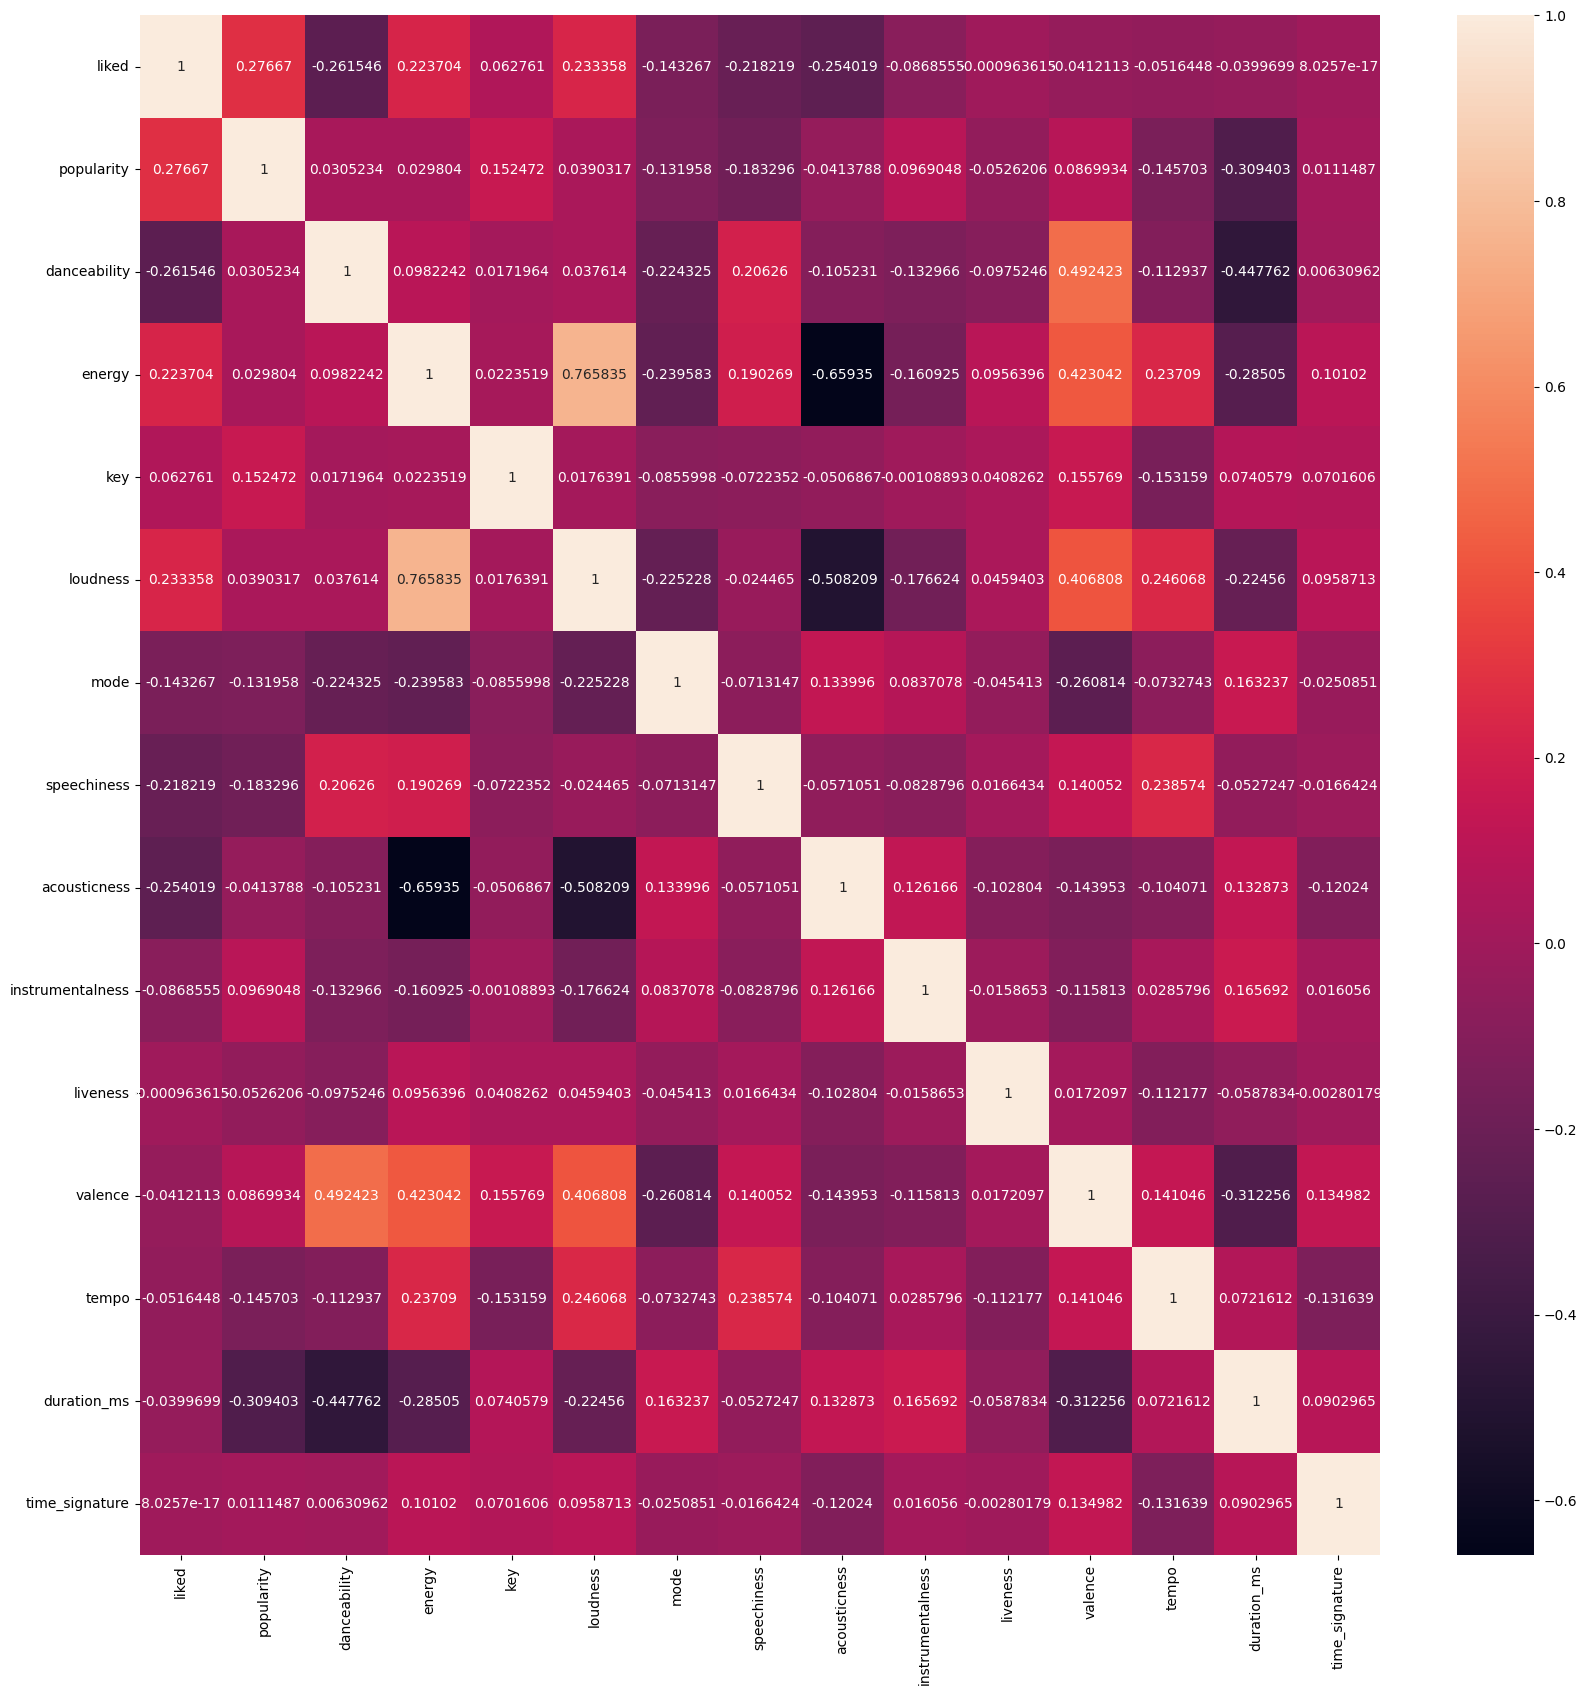

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(playlist_model.corr(),annot=True,fmt='g')
plt.show()

In [ ]:
target = 'liked'
X = playlist_model.drop(target,axis=1)
y = playlist_model[target]

In [ ]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X,y,test_size=0.2,random_state=42)
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((120, 14), (30, 14), (120,), (30,))

### oversampling : Tabular Data - SVMSMOTE

In [ ]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SVMSMOTE

print('Original dataset shape %s' % Counter(y))
sm = SVMSMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({1: 100, 0: 50})
Resampled dataset shape Counter({0: 100, 1: 100})


In [ ]:
train_x, test_x, train_y, test_y = train_test_split(X_res,y_res,test_size=0.2,random_state=42)
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((160, 14), (40, 14), (160,), (40,))

#### RidgeClassifier

In [ ]:
from sklearn.linear_model import RidgeClassifier
model_rc = RidgeClassifier()
model_rc.fit(train_x,train_y)

RidgeClassifier()

In [ ]:
y_pred = model_rc.predict(test_x)
print(model_rc.score(train_x,train_y))
print(model_rc.score(test_x,test_y))

0.74375
0.775


In [ ]:
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.75      0.73        16
           1       0.83      0.79      0.81        24

    accuracy                           0.78        40
   macro avg       0.77      0.77      0.77        40
weighted avg       0.78      0.78      0.78        40



#### LinearDiscriminantAnalysis

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model_lda = LinearDiscriminantAnalysis()
model_lda.fit(train_x,train_y)

LinearDiscriminantAnalysis()

In [ ]:
y_pred = model_lda.predict(test_x)
print(model_lda.score(train_x,train_y))
print(model_lda.score(test_x,test_y))

0.73125
0.8


In [ ]:
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        16
           1       0.83      0.83      0.83        24

    accuracy                           0.80        40
   macro avg       0.79      0.79      0.79        40
weighted avg       0.80      0.80      0.80        40



### w2v

In [ ]:
import numpy as np
import gensim

In [ ]:
# Word2Vec 모델로부터 하나의 문장을 벡터화 시키는 함수 생성
def get_sent_embedding(model, embedding_size, tokenized_words):
    # 임베딩 벡터를 0으로 초기화
    feature_vec = np.zeros((embedding_size,), dtype='float32')
    # 단어 개수 초기화
    n_words = 0
    # 모델 단어 집합 생성
    index2word_set = set(model.wv.key_to_index.keys())
    # 문장의 단어들을 하나씩 반복
    for word in tokenized_words:
        # 모델 단어 집합에 해당하는 단어일 경우에만
        if word in index2word_set:
            # 단어 개수 1 증가
            n_words += 1
            # 임베딩 벡터에 해당 단어의 벡터를 더함
            feature_vec = np.add(feature_vec, model.wv.get_vector(word))
    # 단어 개수가 0보다 큰 경우 벡터를 단어 개수로 나눠줌 (평균 임베딩 벡터 계산)
    if (n_words > 0):
        feature_vec = np.divide(feature_vec, n_words)
    return feature_vec

In [ ]:
# 문장벡터 데이터 셋 만들기
def get_dataset(sentences, model, num_features):
    dataset = list()

    # 각 문장을 벡터화해서 리스트에 저장
    for sent in sentences:
        dataset.append(get_sent_embedding(model, num_features, sent))

    # 리스트를 numpy 배열로 변환하여 반환
    sent_embedding_vectors = np.stack(dataset)

    return sent_embedding_vectors

In [ ]:
w2v_model = gensim.models.Word2Vec(playlist['token'],epochs=1000)

In [ ]:
lyrics_w2v = get_dataset(playlist['token'], w2v_model, 100)

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(lyrics_w2v,y,test_size=0.2,random_state=42)

### oversampling : w2v

In [ ]:
!pip install googletrans==4.0.0-rc1

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 7.8 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17396 sha256=c3a6a07e847293d05c17d5a0c3bec5ef96e32c22f3ade550c1d3ad1fc6ea9e54
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling 

In [ ]:
import googletrans
translator = googletrans.Translator()

def Back_translation(sentence):
    str_en = sentence
    str_en = translator.translate(str_en, dest = 'ja')
    str_en = translator.translate(str_en.text, dest = 'ko')
    return str_en.text

In [ ]:
playlist_w2v_bt = playlist[['lyrics','liked']]

In [ ]:
cnt = len(playlist_w2v_bt)
for i in range(0,50):
    trans_en = Back_translation(playlist_w2v_bt['lyrics'][i])
    playlist_w2v_bt.loc[cnt] = [trans_en,playlist_w2v_bt['liked'][i]]
    cnt+=1
playlist_w2v_bt

<ipython-input-42-2e0981e353bb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playlist_w2v_bt.loc[cnt] = [trans_en,playlist_w2v_bt['liked'][i]]
<ipython-input-42-2e0981e353bb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playlist_w2v_bt.loc[cnt] = [trans_en,playlist_w2v_bt['liked'][i]]
<ipython-input-42-2e0981e353bb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playlist_w2v_bt.loc[cnt] = [trans_en,playlist_w2v_bt['liked'][i]

,lyrics,liked
0,울려댔어 사이렌\n텅 빈 길거리엔\n도망치다 흘린 칼자루와 피가 흥건해\n우리 그때...,0
1,넌 내게 안될꺼란 말을 했지만\n이제 나를 봐 이건 명품이야\n쌈박질만 했지만\n난...,0
2,"난 맨몸으로 시작되어\n천 번은 슬프게 울음\n난 이제 새 신, 새 옷\n백 번은 ...",0
3,"Yeah, ha\nYeah, ha\nYeah, ha\nYeah, ha\nYeah, ...",0
4,널 이제 놓아줘야 될것같애 의미없는 날짜를 셀것같애 내 손이 아닌 꽃이 무대인 나비...,0
...,...,...
195,"Aye, aye, aye, 갱, 갱, 갱\n눈, 눈, 갱, 갱, 갱\nSch Yel...",0
196,벌금은 태그 fuck 가격표를 팝업합니다\n벌금은 마음으로 마음을 훔칩니다\n피네스...,0
197,과거에는 스튜디오 팩 Shochu에서 Melona를 먹었습니다.\n이제 LA에서 S...,0
198,나는 어머니에게 말했다\n내가이 집으로 돌아 왔을 때\n바쁜 버스를 태운 후\n나는...,0


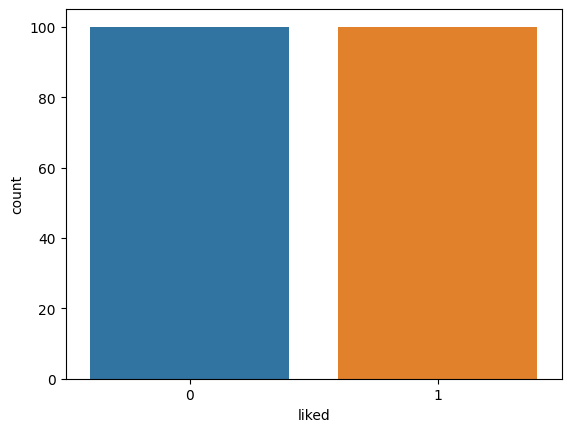

In [ ]:
sns.countplot(data = playlist_w2v_bt, x = 'liked')
plt.show()

In [ ]:
playlist_w2v_bt['token'] = playlist_w2v_bt['lyrics'].apply(lambda x : tokenize(x))

<ipython-input-44-7bece9a7808a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playlist_w2v_bt['token'] = playlist_w2v_bt['lyrics'].apply(lambda x : tokenize(x))


In [ ]:
w2v_model = gensim.models.Word2Vec(playlist_w2v_bt['token'],epochs=1000)

In [ ]:
lyrics_w2v = get_dataset(playlist_w2v_bt['token'], w2v_model, 100)

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(lyrics_w2v,playlist_w2v_bt['liked'],test_size=0.2,random_state=42)

#### RidgeClassifier

In [ ]:
from sklearn.linear_model import RidgeClassifier
model_rc = RidgeClassifier()
model_rc.fit(train_x,train_y)

RidgeClassifier()

In [ ]:
y_pred = model_rc.predict(test_x)
print(model_rc.score(train_x,train_y))
print(model_rc.score(test_x,test_y))

0.9875
0.775


In [ ]:
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.81      0.74        16
           1       0.86      0.75      0.80        24

    accuracy                           0.78        40
   macro avg       0.77      0.78      0.77        40
weighted avg       0.79      0.78      0.78        40



#### LinearDiscriminantAnalysis

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model_lda = LinearDiscriminantAnalysis()
model_lda.fit(train_x,train_y)

LinearDiscriminantAnalysis()

In [ ]:
y_pred = model_lda.predict(test_x)
print(model_lda.score(train_x,train_y))
print(model_lda.score(test_x,test_y))

0.99375
0.8


In [ ]:
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.81      0.76        16
           1       0.86      0.79      0.83        24

    accuracy                           0.80        40
   macro avg       0.79      0.80      0.80        40
weighted avg       0.81      0.80      0.80        40

